In [27]:
import pandas as pd
import numpy as np
input_data = pd.read_csv("20191122210552.csv",encoding = 'cp949').iloc[:,:-5]

In [28]:
display(input_data)

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C)
0,101,2010-01-01,-10.3,-17.7,811,-5.0,1543,1.67,NaN,NaN,...,-20.8,-3.5,-2.2,-0.5,1.6,2.5,7.3,10.8,15.8,17.4
1,101,2010-01-02,-6.1,-12.6,2333,-0.6,1505,13.33,NaN,NaN,...,-18.9,-1.7,-1.1,-0.3,1.4,2.3,7.2,10.7,15.6,17.4
2,101,2010-01-03,-10.5,-17.8,652,-3.6,1510,NaN,NaN,NaN,...,-23.5,-2.0,-1.1,-0.4,1.4,1.9,7.0,10.5,15.4,17.4
3,101,2010-01-04,-6.9,-11.3,459,-3.3,1633,9.92,NaN,NaN,...,-17.0,-1.8,-1.0,-0.3,1.3,2.0,6.8,10.4,15.3,17.4
4,101,2010-01-05,-10.2,-16.7,2334,-4.9,2,NaN,NaN,NaN,...,-26.3,-2.7,-1.5,-0.4,1.3,1.9,6.8,10.4,15.4,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,101,2019-06-26,24.5,19.4,527,28.8,1542,NaN,0.0,NaN,...,16.6,26.1,26.1,25.9,25.6,24.1,20.5,18.2,15.2,14.6
3464,101,2019-06-27,26.9,21.7,534,32.9,1510,NaN,0.0,NaN,...,20.6,27.7,27.4,26.4,25.9,24.2,20.7,18.2,15.3,14.6
3465,101,2019-06-28,26.6,22.9,502,30.3,1651,NaN,0.1,NaN,...,19.9,27.9,27.8,27.2,26.7,24.7,20.8,18.3,15.3,14.6
3466,101,2019-06-29,22.9,19.6,725,27.7,1603,NaN,0.1,NaN,...,18.1,26.6,26.6,26.4,26.3,25.1,21.0,18.4,15.4,14.6


# 비어있는 값 채우기
보통의 경우 0을 채우지만 해당 데이터는 0을 None으로 만들었기 때문에 0으로 치환

비어있는 값이 많지 않은 칼럼의 경우에는 기상데이터의 특성상 1년전 또는 후의 데이터 삽입 넣어줌

In [29]:
append_0_columns = ['강수 계속시간(hr)',
                    '10분 최다 강수량(mm)' ,
                    '10분 최다강수량 시각(hhmi)',
                    '1시간 최다강수량(mm)', 
                    '1시간 최다 강수량 시각(hhmi)', 
                    '일강수량(mm)', 
                    '일 최심신적설(cm)', 
                    '일 최심신적설 시각(hhmi)', 
                    '일 최심적설(cm)',
                    '일 최심적설 시각(hhmi)', 
                    '합계 3시간 신적설(cm)',
                   '평균 전운량(1/10)',
                   '평균 중하층운량(1/10)']
print(input_data.columns) # 칼럼명(필드)목록 출력
input_data[append_0_columns].isnull() #칼럼별 비어있는 값 여부 구하기

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)',

,강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10)
0,False,True,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,True,True,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,False,False,True,False,False
3,False,True,True,True,True,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,True,False,True,False,True,False,True,True,True,True,True,True,True
3464,True,False,True,False,True,False,True,True,True,True,True,True,True
3465,True,False,True,False,True,False,True,True,True,True,True,True,True
3466,True,False,True,False,True,False,True,True,True,True,True,True,True


In [30]:
for column in append_0_columns:
    input_data[column] = input_data[column].fillna(0) #비어있는 값을 특정 값으로 채우기

In [31]:
display(input_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 56 columns):
지점                     3468 non-null int64
일시                     3468 non-null object
평균기온(°C)               3468 non-null float64
최저기온(°C)               3468 non-null float64
최저기온 시각(hhmi)          3468 non-null int64
최고기온(°C)               3468 non-null float64
최고기온 시각(hhmi)          3468 non-null int64
강수 계속시간(hr)            3468 non-null float64
10분 최다 강수량(mm)         3468 non-null float64
10분 최다강수량 시각(hhmi)     3468 non-null float64
1시간 최다강수량(mm)          3468 non-null float64
1시간 최다 강수량 시각(hhmi)    3468 non-null float64
일강수량(mm)               3468 non-null float64
최대 순간 풍속(m/s)          3468 non-null float64
최대 순간 풍속 풍향(16방위)      3468 non-null int64
최대 순간풍속 시각(hhmi)       3468 non-null int64
최대 풍속(m/s)             3468 non-null float64
최대 풍속 풍향(16방위)         3468 non-null int64
최대 풍속 시각(hhmi)         3468 non-null int64
평균 풍속(m/s)             3468 non-null float64
풍정합(100m

None

### 시간 데이터의 경우 카테고리 분류시 값이 너무 많아질 수 있어 int형으로 변환

# 내용이 중첩되는 칼럼(특징) 제거

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

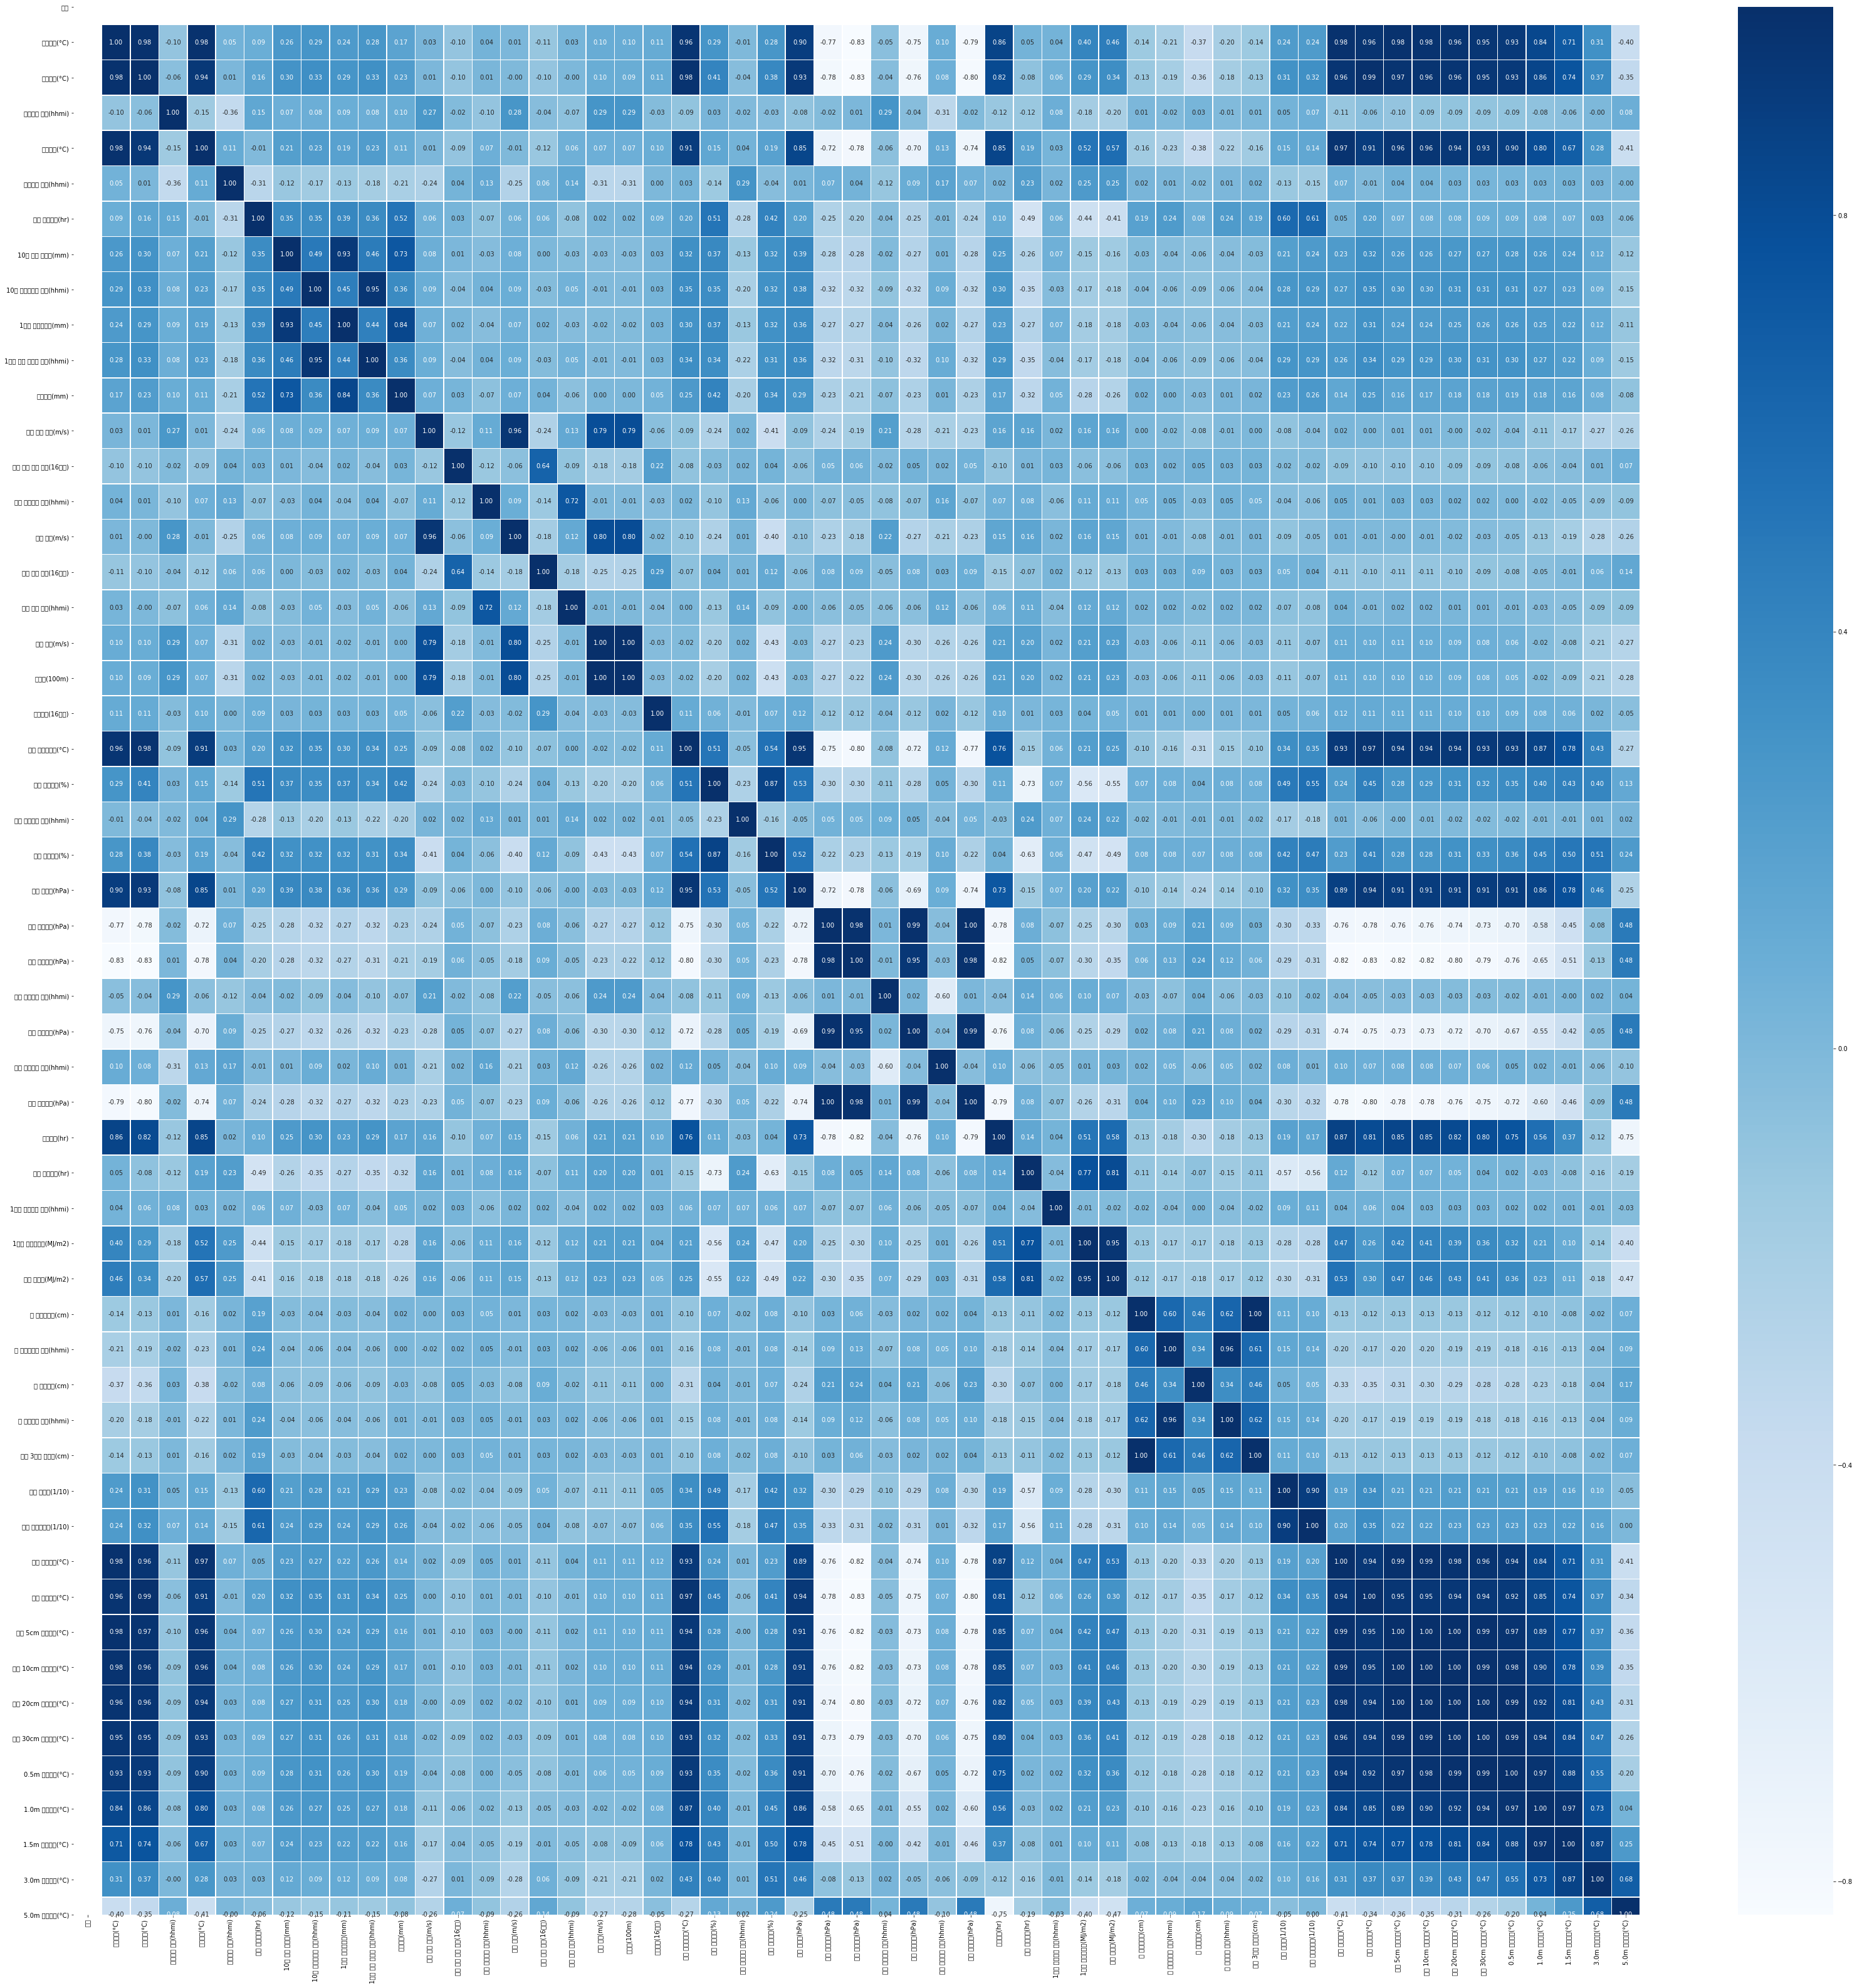

In [33]:
plt.figure(figsize=(56,56))
sns.heatmap(data = input_data.corr(), annot=True, #annot은 각 셀의 값 표시 여부
fmt = '.2f', linewidths=.5, cmap='Blues') #fmt는 annot이 true인 경우에 숫자표시(소숫점 두번째자리)

## 시각화 분석 결과(상관관계가 0.9이상인 데이터 삭제)
시각화 결과 온도와 관련된 대부분의 Feature가 상관관계가 매우 높아 비슷한 정보를 가지고 있음을 알수 있다. <br> 평균 기온을 제외한 나머지 정보는 제거한다. <br> 또한 평균 증기압 역시 상관관계가 매우 높아 제거한다. <br> 평균 풍속과 풍정합, 최대 순간 풍속 특징은 매우 비슷함 <br> 일사량 간 상관관계가 매우 높음

In [34]:
input_data = input_data.loc[:,['지점', '일시', '평균기온(°C)',  '최저기온 시각(hhmi)', 
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '일강수량(mm)',  
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '평균 풍속(m/s)', '최다풍향(16방위)',
        '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
        '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)',  '합계 일사량(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)',
        '평균 전운량(1/10)']] #제거할 특징만 가져옴

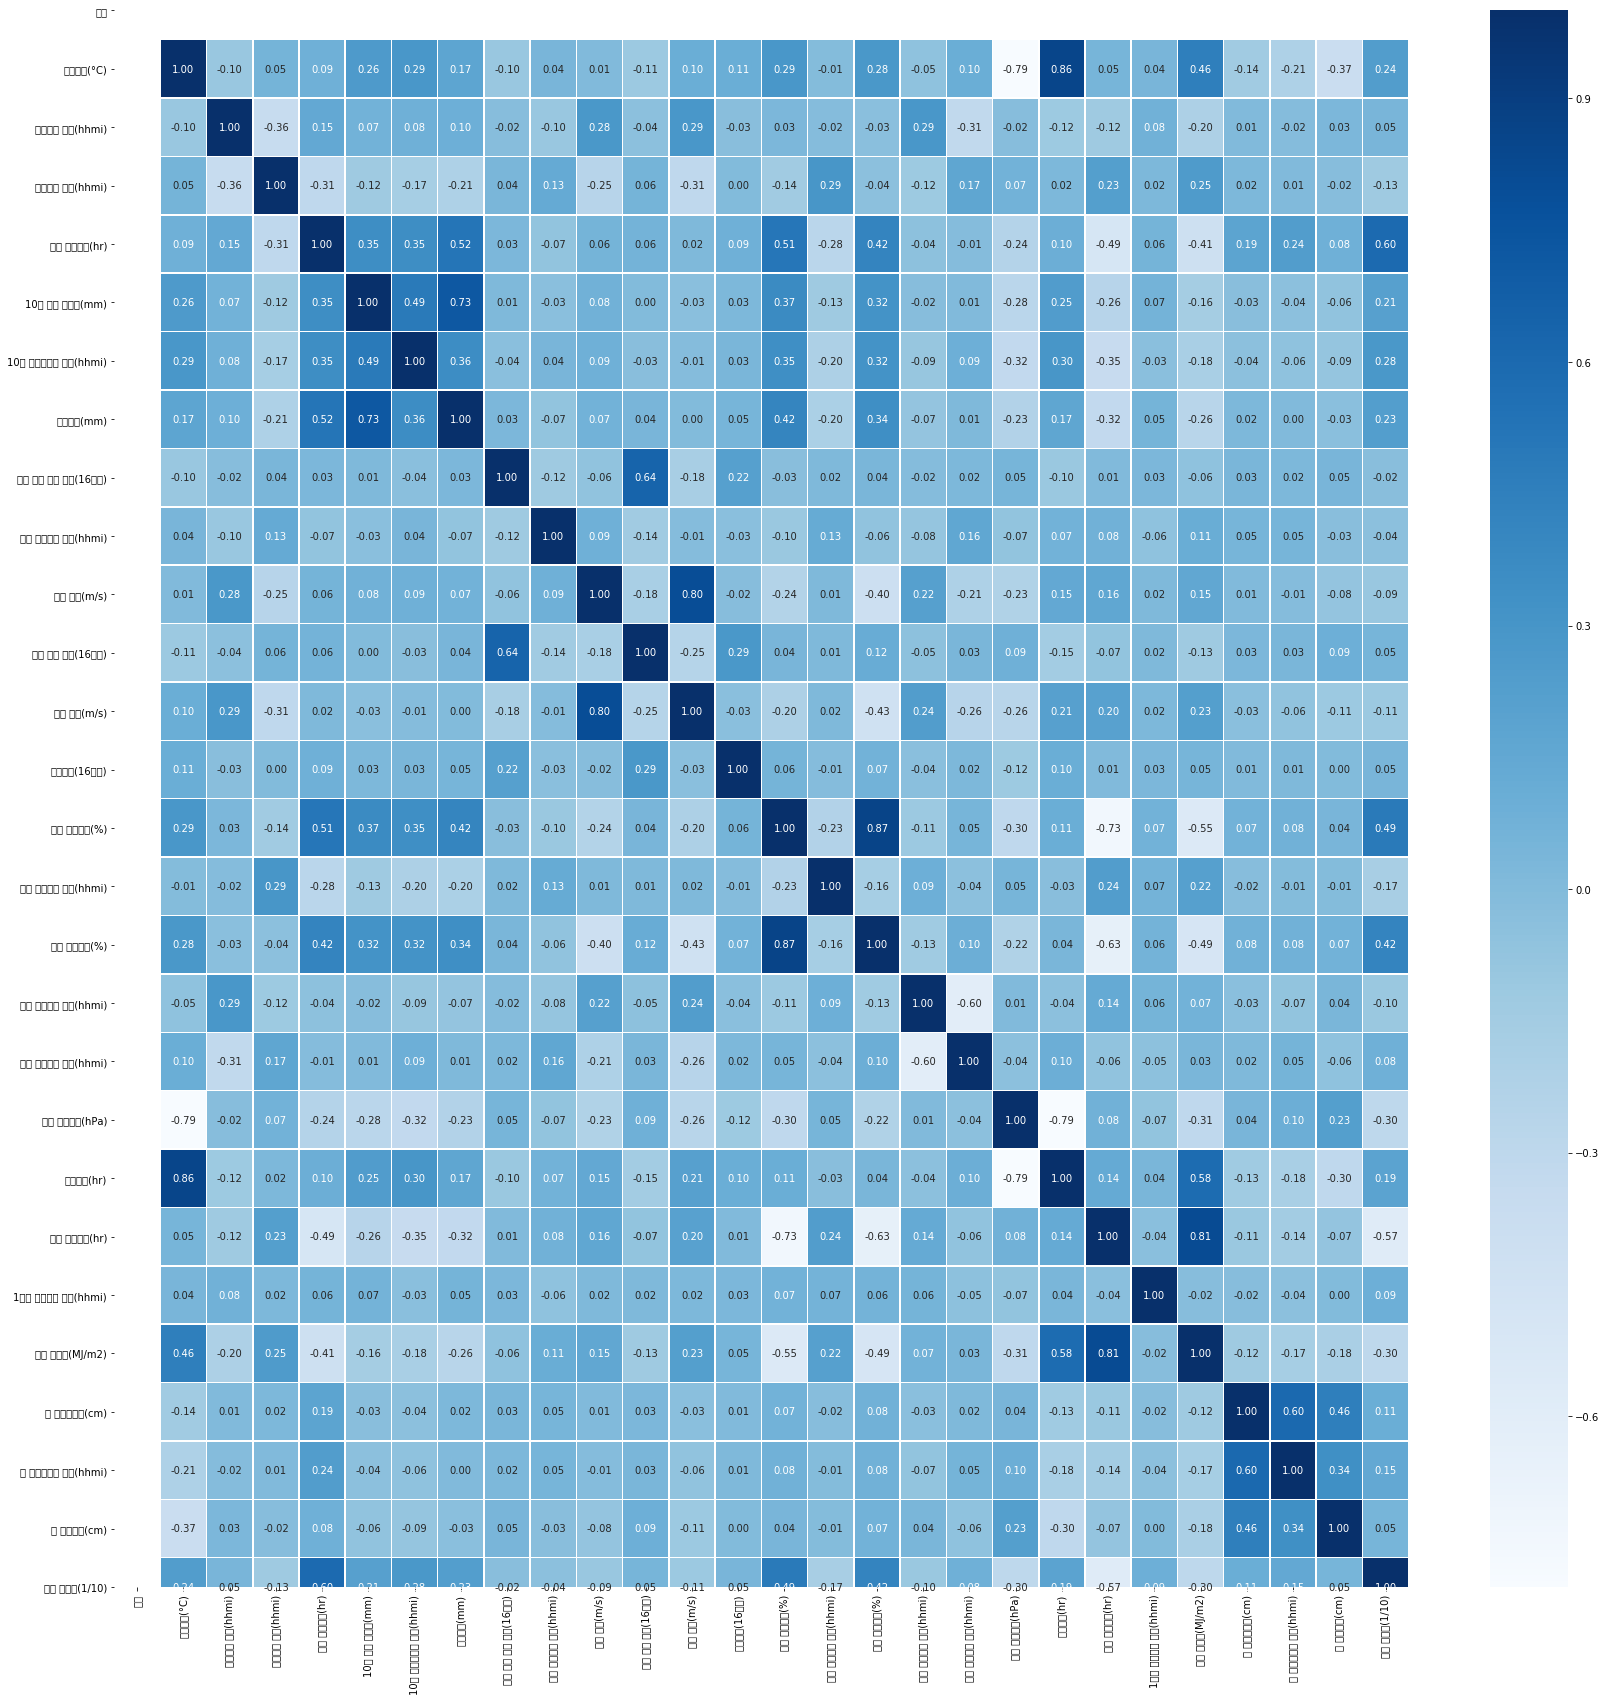

In [35]:
plt.figure(figsize=(29,29))
sns.heatmap(data = input_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

여전히 특징이 많기 때문에 특징을 더욱 제거한다.

In [36]:
year_list = [2010,2011,2012,2013,2014,2015,2016,2017,2018]
label = pd.concat([pd.read_excel("2010미세먼지.xlsx"),
                   pd.read_excel("2011미세먼지.xlsx"),
                   pd.read_excel("2012미세먼지.xlsx"),
                   pd.read_excel("2013미세먼지.xlsx"),
                   pd.read_excel("2014미세먼지.xlsx"),
                   pd.read_excel("2015미세먼지.xlsx"),
                   pd.read_excel("2016미세먼지.xlsx"),
                   pd.read_excel("2017미세먼지.xlsx"),
                   pd.read_excel("2018미세먼지.xlsx"),
                   pd.read_excel("2019미세먼지.xlsx")]) #concat으로 데이터프레임 결합


c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [37]:
import os
fix_dir_list = os.listdir("미세먼지 참조(석사)/") #os.listdir 파일목록 가져오기
fix_data = pd.concat( #dataframe 합치기
    [pd.read_excel("./미세먼지 참조(석사)/" + fix_dir_list[0]),
    pd.read_excel("./미세먼지 참조(석사)/" + fix_dir_list[1]),
    pd.read_excel("미세먼지 참조(석사)/" + fix_dir_list[2]),
    pd.read_excel("미세먼지 참조(석사)/" + fix_dir_list[3])]
                    )
fix_data["측정일시"].astype('str') #타입변환
fix_day = fix_data["측정일시"].astype('str').to_list() #리스트로 출력

In [38]:
to_fix_data = label["측정일시"].to_list()
fix_index = []
for i in range(len(to_fix_data)):
    if str(to_fix_data[i]) in fix_day:
        fix_index.append(i) # 맨 뒤에 추가

In [39]:
to_fix_pm10 = label["PM10"].to_list()
seoksa_pm10 = fix_data["PM10"].to_list()
cnt = 0
for i in fix_index:
    to_fix_pm10[i] = seoksa_pm10[cnt]
    cnt += 1

In [40]:
label["PM10"] = to_fix_pm10

In [41]:
display(label.shape[0]/24)

3477.0

In [42]:
pm10_list = []
day_list = []
step_pm10 = 0
cnt = 0
label["측정일시"].astype('str')
for i,pm10 in label.iterrows():
    if i % 24 == 0:
        cnt = 0
        step_pm10 = 0
    if pm10["PM10"] != np.nan and pm10["PM10"] > 0:
        cnt += 1
        step_pm10+=pm10['PM10']
    if i % 24 == 23:
        if cnt == 0:
            continue
        pm10["측정일시"] = str(pm10["측정일시"])
        pm10_list.append([pm10["측정일시"][:4] +'-' + pm10["측정일시"][4:6] +'-' + pm10["측정일시"][6:8],step_pm10/cnt])

In [43]:
input_data["label"] = 0

In [44]:
len(pm10_list),len(input_data)

(3439, 3468)

In [45]:
li = []
for i in pm10_list:
    li.append(i[0])
j =0
pm_10_list = np.array(pm10_list)
label_list = []
for i,d in input_data.iterrows():
    if d["일시"] in li:
        label_list.append(pm10_list[li.index(d["일시"])][1])
    if d["일시"] not in li:
        label_list.append(np.nan)

In [46]:
new_label_list = []
for i in range(0,len(label_list)):
    if i == len(label_list)-1:
        new_label_list.append(0)
    else:
        new_label_list.append(label_list[i+1])
# 데이터를 한칸씩 밀어서 삽입
input_data["label"] = new_label_list

In [47]:
input_data = input_data.iloc[:-1]#마지막 데이터는 불필요 데이터가 된다.

In [48]:
display(input_data[input_data["label"] == input_data["label"].max()])

,지점,일시,평균기온(°C),최저기온 시각(hhmi),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),일강수량(mm),최대 순간 풍속 풍향(16방위),...,평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),1시간 최다일사 시각(hhmi),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),평균 전운량(1/10),label
1878,101,2015-02-22,4.2,2347,1216,6.92,0.0,0.0,2.1,230,...,1015.7,11.1,7.4,1100,11.42,0.0,0.0,0.0,6.5,575.958333


In [49]:
display(input_data.corr()["label"])

지점                         NaN
평균기온(°C)             -0.373663
최저기온 시각(hhmi)        -0.052903
최고기온 시각(hhmi)         0.102853
강수 계속시간(hr)          -0.151828
10분 최다 강수량(mm)       -0.184356
10분 최다강수량 시각(hhmi)   -0.250767
일강수량(mm)             -0.176242
최대 순간 풍속 풍향(16방위)     0.111178
최대 순간풍속 시각(hhmi)      0.014626
최대 풍속(m/s)           -0.057502
최대 풍속 풍향(16방위)        0.108268
평균 풍속(m/s)           -0.148976
최다풍향(16방위)           -0.045162
최소 상대습도(%)           -0.230171
최소 상대습도 시각(hhmi)      0.067025
평균 상대습도(%)           -0.192923
최고 해면기압 시각(hhmi)     -0.035529
최저 해면기압 시각(hhmi)      0.050441
평균 해면기압(hPa)          0.279113
가조시간(hr)             -0.266052
합계 일조시간(hr)           0.111786
1시간 최다일사 시각(hhmi)     0.010949
합계 일사량(MJ/m2)        -0.043400
일 최심신적설(cm)          -0.008003
일 최심신적설 시각(hhmi)      0.018157
일 최심적설(cm)            0.065247
평균 전운량(1/10)         -0.136383
label                 1.000000
Name: label, dtype: float64

### input_data에서 지점과 일시의 모두 같으므로 불필요

In [57]:
input_data = input_data.drop(["지점","일시"],axis = 1) #지점,일시 제거

In [58]:
column_name = input_data.columns
display(input_data)

,평균기온(°C),최저기온 시각(hhmi),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),일강수량(mm),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),...,평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),1시간 최다일사 시각(hhmi),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),평균 전운량(1/10),label
0,-10.3,811,1543,1.67,0.0,0.0,0.1,20,1422,1.8,...,1022.5,9.6,5.1,1100,7.87,0.1,2400.0,1.3,4.1,41.041667
1,-6.1,2333,1505,13.33,0.0,0.0,7.1,320,932,2.6,...,1017.4,9.6,1.8,1400,3.14,7.8,1300.0,9.0,8.0,50.916667
2,-10.5,652,1510,0.00,0.0,0.0,0.0,360,1519,1.5,...,1022.0,9.6,6.6,1300,9.21,0.0,0.0,8.2,5.0,33.416667
3,-6.9,459,1633,9.92,0.0,0.0,13.7,200,2356,3.5,...,1013.8,9.6,0.0,1300,2.90,23.0,1700.0,30.0,9.0,47.291667
4,-10.2,2334,2,0.00,0.0,0.0,0.0,230,7,3.6,...,1021.8,9.7,7.1,1300,9.55,0.0,0.0,29.3,1.8,53.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,25.3,532,1705,0.00,0.0,0.0,0.0,270,1640,2.7,...,1013.9,14.8,13.5,1200,23.93,0.0,0.0,0.0,0.0,39.541667
3463,24.5,527,1542,0.00,0.0,0.0,0.0,320,310,2.6,...,1008.8,14.8,2.9,900,12.84,0.0,0.0,0.0,0.0,23.791667
3464,26.9,534,1510,0.00,0.0,0.0,0.0,340,1526,2.7,...,1000.3,14.8,5.1,1200,18.62,0.0,0.0,0.0,0.0,36.166667
3465,26.6,502,1651,0.00,0.1,0.0,0.1,180,1824,3.1,...,1001.2,14.8,5.6,1100,15.90,0.0,0.0,0.0,0.0,29.250000


In [59]:
#한글 폰트 깨지는 경우 이 코드 추가
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

c:\python\venv\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


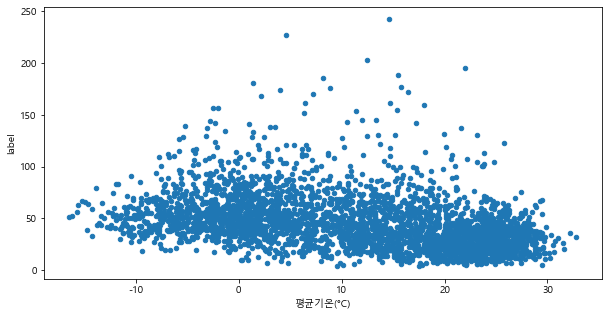

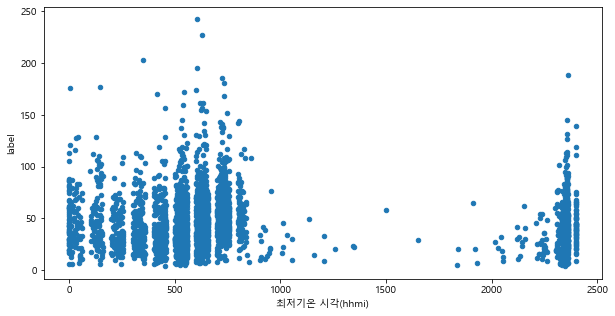

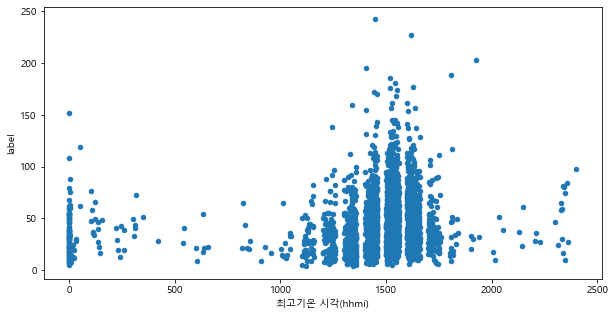

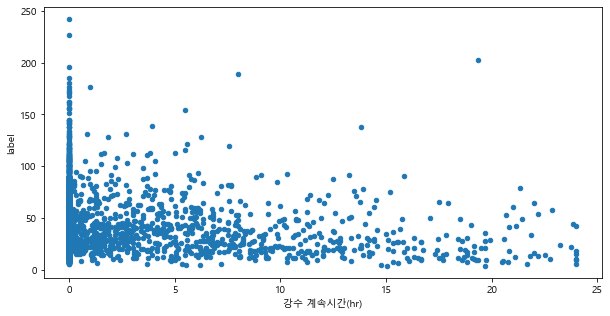

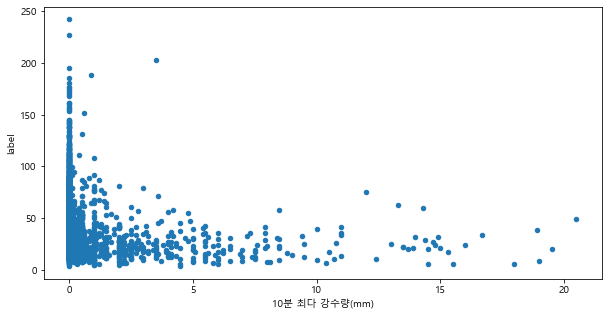

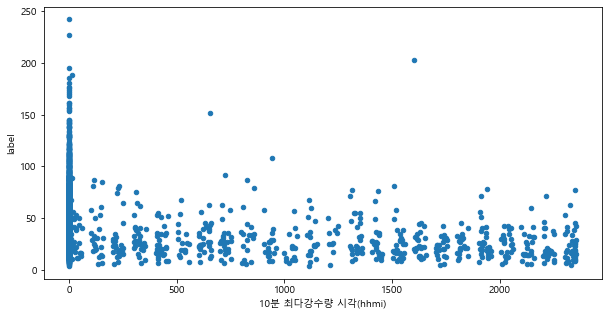

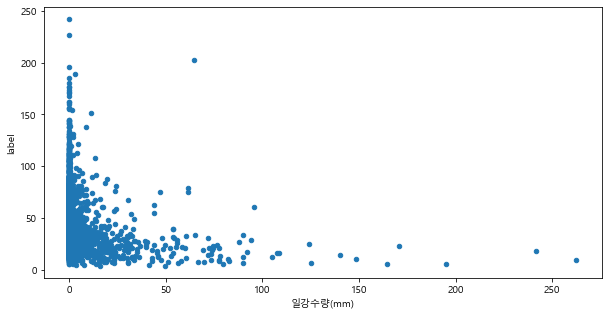

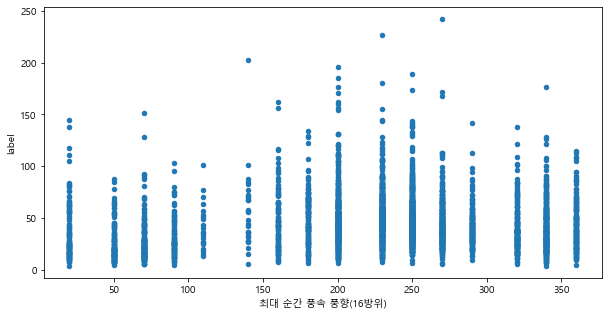

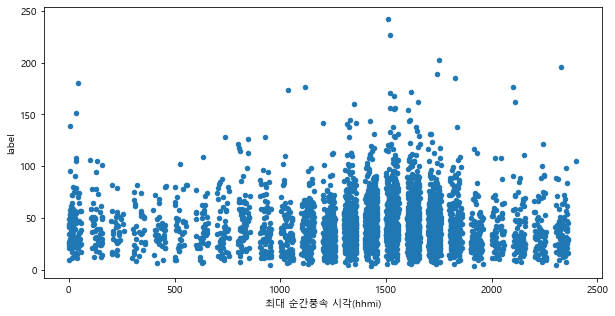

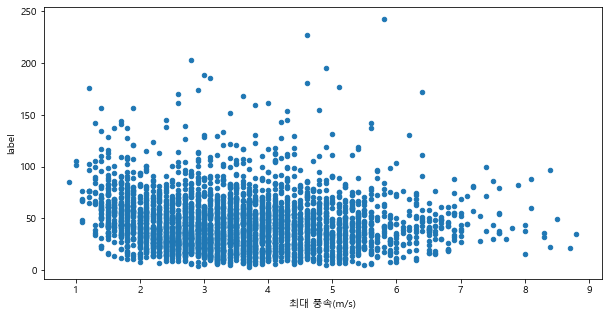

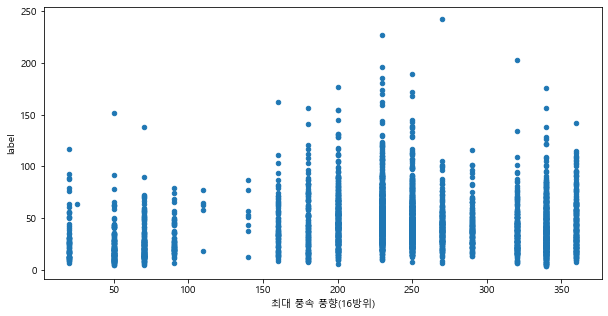

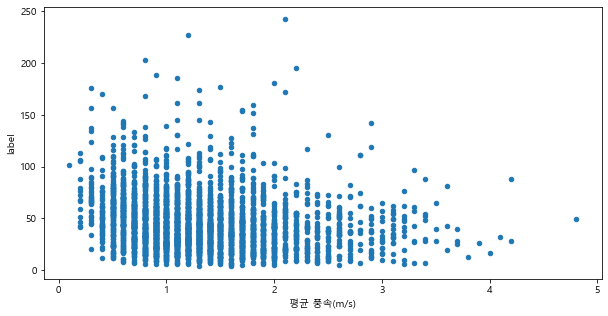

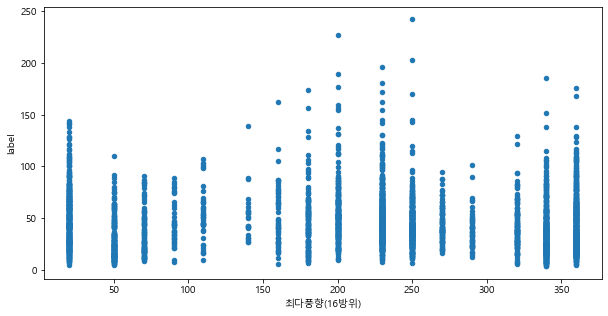

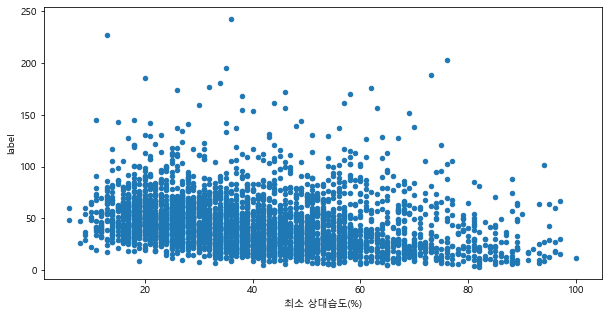

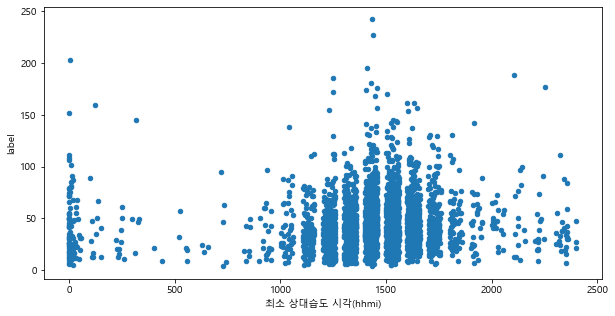

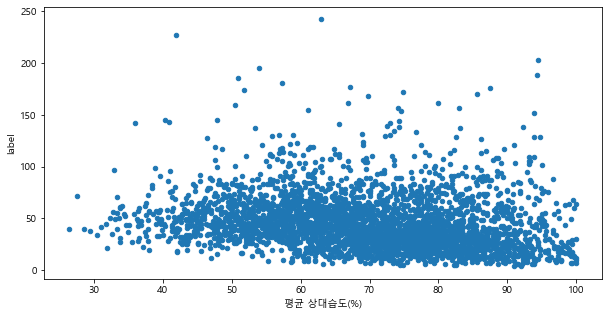

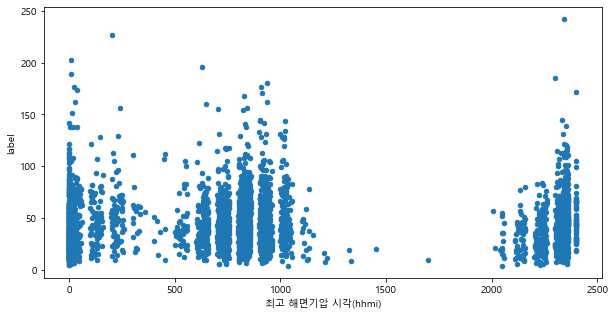

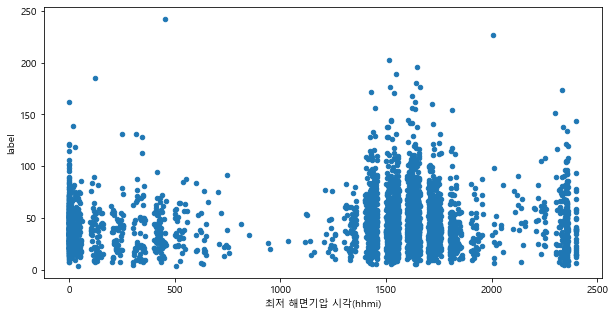

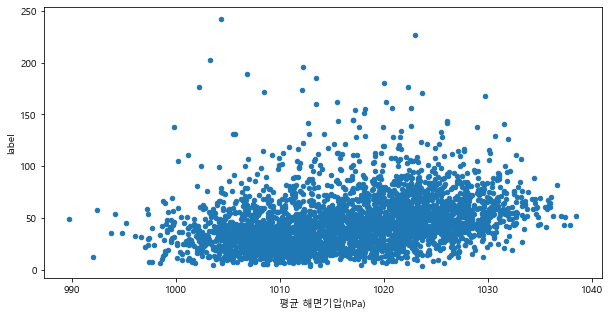

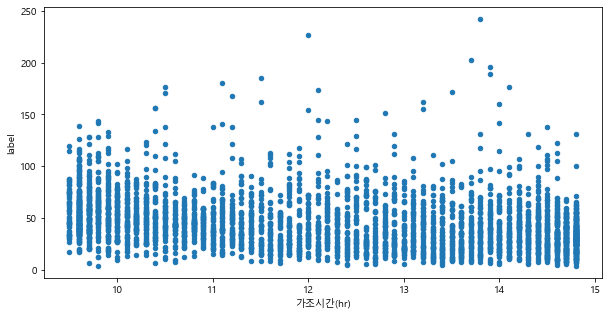

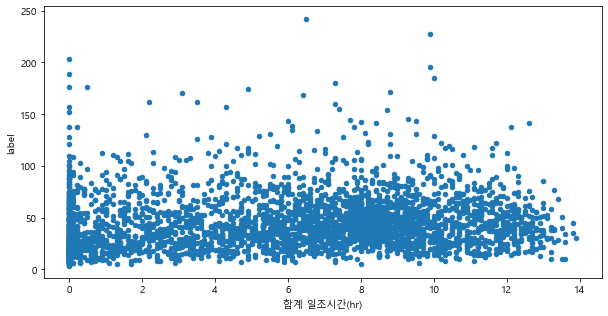

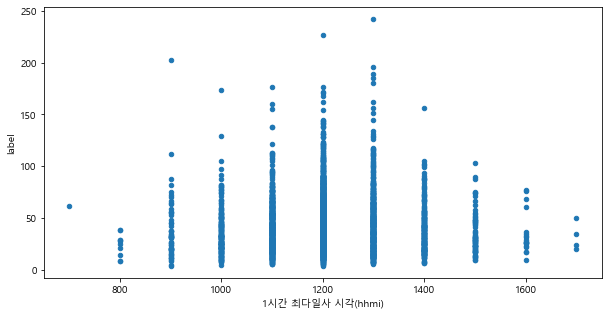

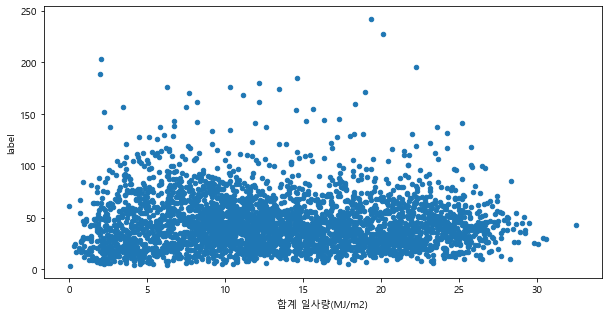

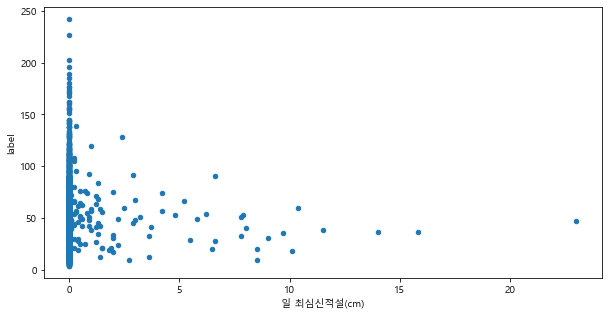

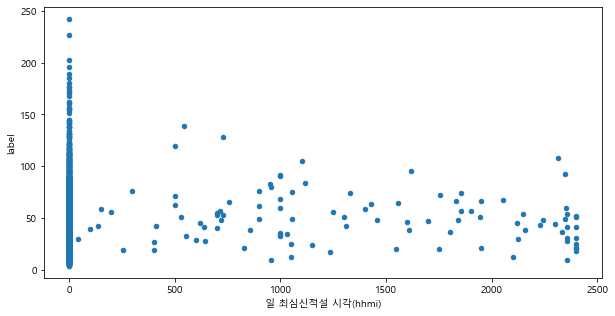

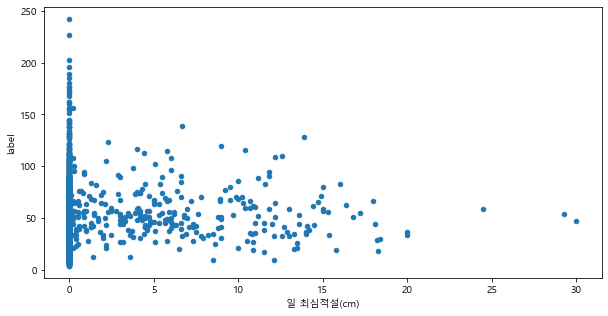

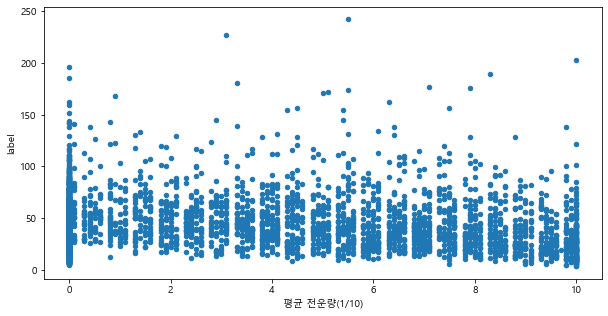

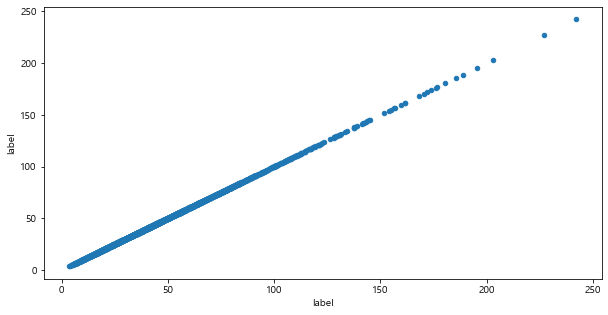

In [60]:
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
for name in column_name:
    input_data.plot(kind = "scatter",x = name, y = "label",figsize = (10,5))

비가 오거나 강우가 있는 경우에 비교적 미세먼지 농도가 낮은 것을 볼 수 있다. 따라서 중앙 값을 기준으로 0과 1로 구분한다.

또한 그래프 내에서 불필요하게 튀는 값을 관찰 가능 -> 제거

In [56]:
input_data = input_data[input_data["label"] != input_data["label"].max() ] #가장 큰 값을 반환

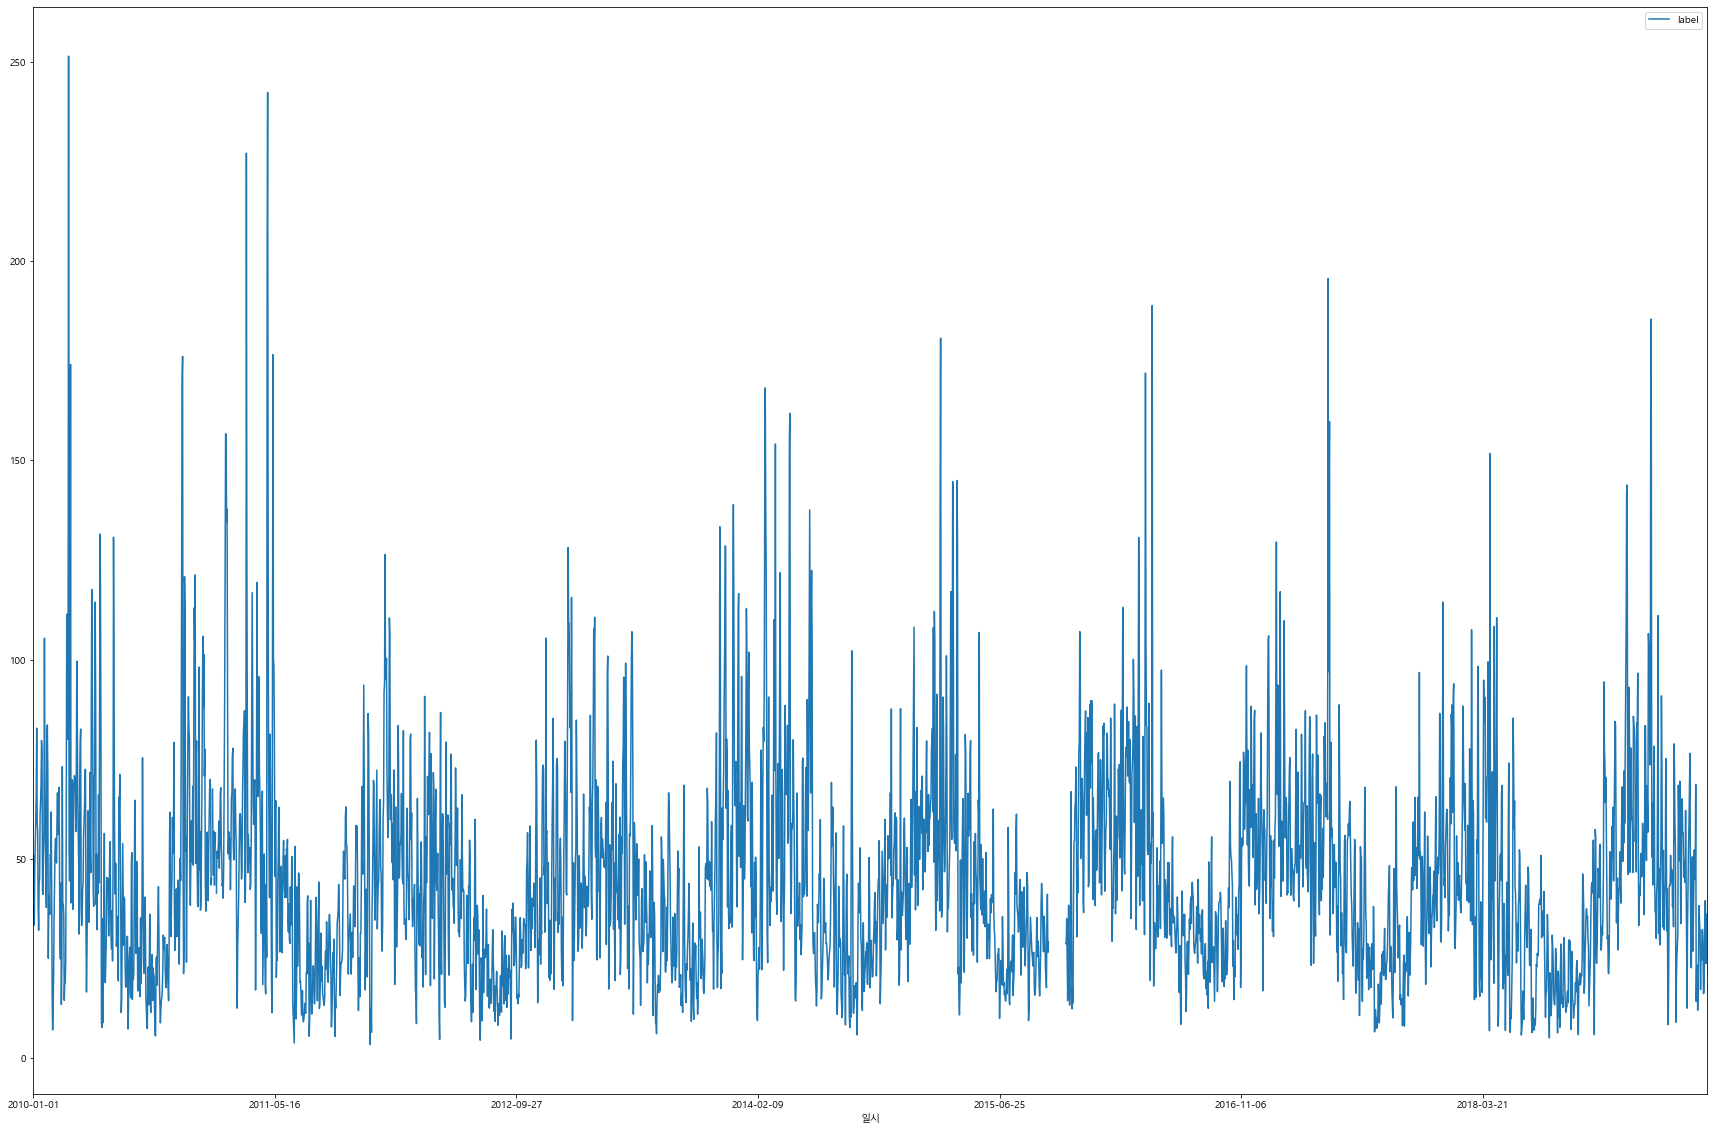

In [55]:
input_data.plot(x = '일시',y = 'label',figsize = (30,20))

In [59]:
input_data.columns

Index(['평균기온(°C)', '최저기온 시각(hhmi)', '최고기온 시각(hhmi)', '강수 계속시간(hr)',
       '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속 풍향(16방위)',
       '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '평균 풍속(m/s)',
       '최다풍향(16방위)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '최고 해면기압 시각(hhmi)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조시간(hr)', '1시간 최다일사 시각(hhmi)', '합계 일사량(MJ/m2)', '일 최심신적설(cm)',
       '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '평균 전운량(1/10)', 'label'],
      dtype='object')

In [61]:
rain = ['10분 최다 강수량(mm)', '일강수량(mm)','일 최심신적설(cm)', '일 최심적설(cm)']

In [62]:
input_data["10분 최다 강수량(mm)"].mean() #mean() 평균구하기

0.4800288600288601

In [63]:
for r in rain:
    input_data[input_data[r]==0][r] = 0
    input_data[input_data[r]>0][r] = 1

c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\venv\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
input_data[input_data['최다풍향(16방위)'] == np.nan] = input_data["최다풍향(16방위)"].median()
input_data[input_data['최소 상대습도(%)'] == np.nan] = input_data["최소 상대습도(%)"].median()
input_data[input_data['최소 상대습도 시각(hhmi)'] == np.nan] = input_data["최소 상대습도 시각(hhmi)"].median()
input_data = input_data.dropna(axis = 0)

리니어 모델 생성

In [65]:
x_data = input_data.iloc[:,:-1]
y_data = input_data.iloc[:,-1]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 42)

In [67]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'fit_intercept' : [True,False], "normalize" : [True,False]}
]

grid_search=GridSearchCV(linear,
                        param_grid,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid=[{'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [71]:
np.sqrt(-(grid_search.best_score_))

22.234905518188125

In [72]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(grid_search.predict(x_test),y_test)))

22.418924795600006


In [73]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [74]:
x_data.shape

(3414, 27)

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'max_features' : [12,15,17], 
     "max_depth" : [3,5,8],
     'min_samples_leaf' : [10,15,20,30],
     'max_leaf_nodes' : [120,200,300]}
]

grid_search=GridSearchCV(tree,
                        param_grid,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [3, 5, 8], 'max_features': [12, 15, 17],
                          'max_leaf_nodes': [120, 200, 300],
                          'min_samples_leaf': [10, 15, 20, 30]}],
     

In [86]:
print(grid_search.best_params_)
print(np.sqrt(-grid_search.best_score_))
print(np.sqrt(mean_squared_error(grid_search.predict(x_test),y_test)))

{'max_depth': 5, 'max_features': 15, 'max_leaf_nodes': 120, 'min_samples_leaf': 20}
21.878631656346627
22.70028356223266


In [87]:
print(np.sqrt(mean_squared_error(tree.predict(x_test),y_test)))

27.687555023629436


In [88]:
for name, importance in zip(input_data.columns[:-1],tree.feature_importances_):
    print(name , " : ", importance)

평균기온(°C)  :  0.2206133096241501
최저기온 시각(hhmi)  :  0.022820271274518612
최고기온 시각(hhmi)  :  0.0479099264436346
강수 계속시간(hr)  :  0.009816725099161991
10분 최다 강수량(mm)  :  0.0035711477665988593
10분 최다강수량 시각(hhmi)  :  0.016423020622925506
일강수량(mm)  :  0.006375816795066189
최대 순간 풍속 풍향(16방위)  :  0.019719762413993563
최대 순간풍속 시각(hhmi)  :  0.04834624454797765
최대 풍속(m/s)  :  0.0503105114271788
최대 풍속 풍향(16방위)  :  0.06426117977543928
평균 풍속(m/s)  :  0.025061246785815137
최다풍향(16방위)  :  0.01221794316516363
최소 상대습도(%)  :  0.0654103653780794
최소 상대습도 시각(hhmi)  :  0.015930968434332008
평균 상대습도(%)  :  0.048018138131736166
최고 해면기압 시각(hhmi)  :  0.021895079029983232
최저 해면기압 시각(hhmi)  :  0.06733316751683634
평균 해면기압(hPa)  :  0.049377301427882575
가조시간(hr)  :  0.08588297679795294
합계 일조시간(hr)  :  0.018778202529163474
1시간 최다일사 시각(hhmi)  :  0.004045255348390879
합계 일사량(MJ/m2)  :  0.04888316314710661
일 최심신적설(cm)  :  2.2157186530897168e-05
일 최심신적설 시각(hhmi)  :  0.0022677312998802433
일 최심적설(cm)  :  0.003965428148592665
평균 전운량

In [89]:
sort_importances = sorted(tree.feature_importances_)
importances = list(tree.feature_importances_)

In [ ]:
columns_name = input_data.columns[:-1]
important_top_15 = []
for important in sort_importances:
    i = importances.index(important)
    important_top_15.append(columns_name[i])
    print(columns_name[i],' : ',importances[i])
    

In [91]:
important_top_15 = important_top_15[-15:]

In [92]:
print(important_top_15)

['평균 전운량(1/10)', '최고 해면기압 시각(hhmi)', '최저기온 시각(hhmi)', '평균 풍속(m/s)', '최고기온 시각(hhmi)', '평균 상대습도(%)', '최대 순간풍속 시각(hhmi)', '합계 일사량(MJ/m2)', '평균 해면기압(hPa)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최소 상대습도(%)', '최저 해면기압 시각(hhmi)', '가조시간(hr)', '평균기온(°C)']


In [93]:
input_data = input_data.loc[:,important_top_15]

In [94]:
x_data = input_data.iloc[:,:-1]
y_data = input_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.2,random_state = 42)

In [95]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)

c:\python\venv\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid=[
   {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5,10,20,50]
   }
]

grid_search=GridSearchCV(random_forest,
                        param_grid,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [True, False],
      

In [109]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [107]:
np.sqrt(-grid_search.best_score_)

3.843056314356507

In [108]:
print(np.sqrt(mean_squared_error(grid_search.predict(x_test),y_test)))

3.7810573858053784


In [100]:
from keras.layers import Dense,Dropout,Input
from keras.models import Model
input_ = Input((14,))
dense_1 = Dense(50, activation='relu')(input_)
dense_2 = Dense(50,activation = 'relu')(dense_1)
output = Dense(1,activation='linear')(dense_2)
model = Model([input_],output)
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [101]:
model.fit(x_data,y_data,epochs = 204,validation_split=0.2)

Train on 2731 samples, validate on 683 samples
Epoch 1/204
2731/2731 [==============================] - 0s 46us/step - loss: 4177.8942 - val_loss: 446.7279
Epoch 2/204
2731/2731 [==============================] - 0s 23us/step - loss: 359.6696 - val_loss: 234.7570
Epoch 3/204
2731/2731 [==============================] - 0s 21us/step - loss: 249.6524 - val_loss: 184.2555
Epoch 4/204
2731/2731 [==============================] - 0s 21us/step - loss: 216.1817 - val_loss: 168.1597
Epoch 5/204
2731/2731 [==============================] - 0s 21us/step - loss: 199.9171 - val_loss: 169.8014
Epoch 6/204
2731/2731 [==============================] - 0s 21us/step - loss: 172.0102 - val_loss: 147.8129
Epoch 7/204
2731/2731 [==============================] - 0s 22us/step - loss: 157.4588 - val_loss: 137.6777
Epoch 8/204
2731/2731 [==============================] - 0s 22us/step - loss: 143.5641 - val_loss: 153.5929
Epoch 9/204
2731/2731 [==============================] - 0s 23us/step - loss: 136.9714 -

In [99]:
print(np.sqrt(model.evaluate(x_test,y_test)))

683/683 [==============================] - 0s 12us/step
6.044495325847352


In [ ]:
!pip install pygraphviz